The chance-constrained optimization approach basically limits the RES output to a value smaller than maximum expected output. Since they are trying to maximize profits, the optimization problem will always push this constraint to the upper limit.

In [372]:
from scipy.stats import norm, beta, weibull_min
import matplotlib.pyplot as plt
import numpy as np
from random import choices
import seaborn as sns
plt.style.use({'figure.facecolor':'white'})

eta_conf = 95/100       # -
P_1_12_fore = 100       # kW
sigma_1_12_fore = 5     # kw

P_1_12 = P_1_12_fore + sigma_1_12_fore*norm.ppf(1 - eta_conf)
print(P_1_12)
print(norm.ppf(1 - eta_conf, loc=P_1_12_fore, scale=sigma_1_12_fore))

91.77573186524263
91.77573186524263


Juan paper: robust

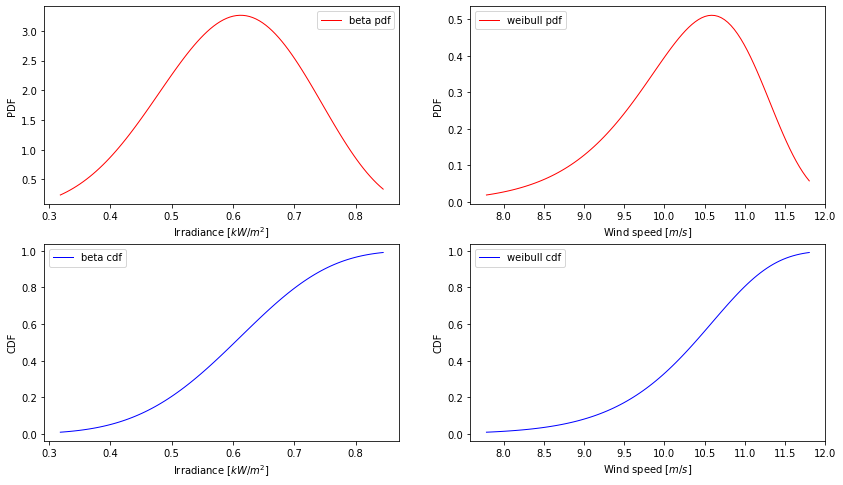

In [373]:
kappa = 14.73   # shape
lambd = 10.64   # scale
a = 9.82
b = 6.58

irrad = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
wind = np.linspace(weibull_min.ppf(0.01, kappa, scale=lambd), weibull_min.ppf(0.99, kappa, scale=lambd), 100)

fig, ax = plt.subplots(nrows=2, ncols=2, squeeze=False, figsize=(14,8))
ax[0,0].plot(irrad, beta.pdf(irrad, a, b), 'r-', lw=1, alpha=1, label='beta pdf');ax[0,0].set_xlabel('Irradiance [$kW/m^2$]');ax[0,0].set_ylabel('PDF');ax[0,0].legend()
ax[1,0].plot(irrad, beta.cdf(irrad, a, b), 'b-', lw=1, alpha=1, label='beta cdf');ax[1,0].set_xlabel('Irradiance [$kW/m^2$]');ax[1,0].set_ylabel('CDF');ax[1,0].legend()
ax[0,1].plot(wind, weibull_min.pdf(wind, kappa, scale=lambd), 'r-', lw=1, alpha=1, label='weibull pdf');ax[0,1].set_xlabel('Wind speed [$m/s$]');ax[0,1].set_ylabel('PDF');ax[0,1].legend()
ax[1,1].plot(wind, weibull_min.cdf(wind, kappa, scale=lambd), 'b-', lw=1, alpha=1, label='weibull cdf');ax[1,1].set_xlabel('Wind speed [$m/s$]');ax[1,1].set_ylabel('CDF');ax[1,1].legend();

In [380]:
print('Selecting random variable from the distribution.')
print('PV irradiation: ', choices(irrad, beta.pdf(irrad, a, b))[0])
print('Wind speed: ', choices(wind, weibull_min.pdf(wind, kappa, scale=lambd))[0])

ws = choices(wind, weibull_min.pdf(wind, kappa, scale=lambd))[0]
wsin = 3        #Cut-in wind speed in (m/s)
wsr = 12        #Rated wind speed in (m/s)
wsout = 20      #Cut-off wind speed in (m/s)
Pwpp = 180      #Max. MW of the wind power plant

if ws<wsin:
    Pwt = 0
elif wsin < ws < wsr:
    Pwt = Pwpp*(ws**3-wsin**3)/(wsr**3-wsin**3)
elif wsr < ws < wsout:
    Pwt_act = Pwpp
elif ws>wsout:
    Pwt_act = 0

print('Wind output power: ', Pwt, ' kW')

Selecting random variable from the distribution.
PV irradiation:  0.6481070634571428
Wind speed:  9.733302195893122
Wind output power:  145.5659860089218  kW


In [375]:
# check_w = []
# check_p = []
# for i in range(100000):
#     check_w.append(choices(wind, weibull_min.pdf(wind, kappa, scale=lambd))[0])
#     check_p.append(choices(irrad, beta.pdf(irrad, a, b))[0])

In [376]:
# plt.hist(check_w, bins=100);
# np.mean(check_w)

In [377]:
# plt.hist(check_p, bins=100);
# np.mean(check_p)


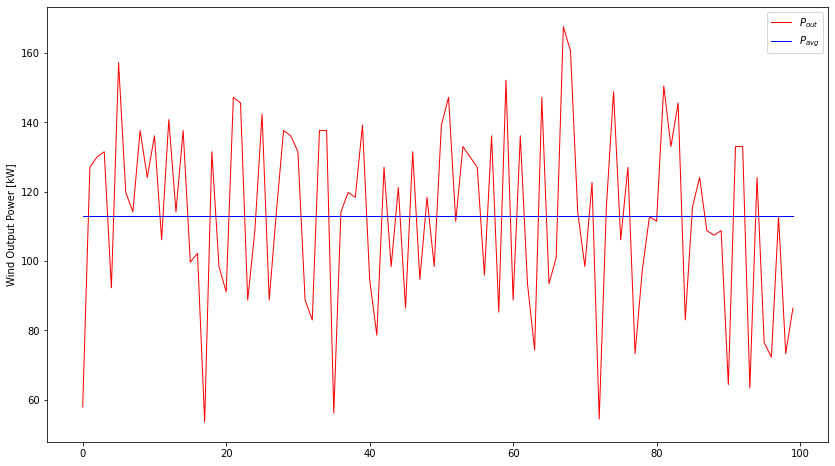

In [398]:
Pwt_act = []
for i in range(100):
    ws = choices(wind, weibull_min.pdf(wind, kappa, scale=lambd))[0]

    if ws<wsin:
        Pwt_act.append(0)
    elif wsin < ws < wsr:
        Pwt_act.append(Pwpp*(ws**3-wsin**3)/(wsr**3-wsin**3))
    elif wsr < ws < wsout:
        Pwt_act.append(Pwpp)
    elif ws>wsout:
        Pwt_act.append(0)

fig, ax = plt.subplots(squeeze=False, figsize=(14,8))
ax[0,0].plot(Pwt_act, 'r-', lw=1, alpha=1, label='$P_{out}$');ax[0,0].set_ylabel('Wind Output Power [kW]')
avg = np.mean(Pwt_act)*np.ones(len(Pwt_act))
ax[0,0].plot(avg, 'b-', lw=1, alpha=1, label='$P_{avg}$');ax[0,0].legend();